# Project: Analysis of Movie Score and various Movie Stats

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

**How do we decide which movie is worth investing ~2 hours of our life into?** One popular way to pick the right movie is to find viewer scores of the movies we may be interested in. **IMDb**, an abbreviation of Internet Movie Database, is the biggest source of movie information including viewer scores, and using their data, we are going to analyze the characteristics of the movies that generate high viewer movie score.

In [55]:
# Import necessary packages for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [56]:
# Load data and observe columns
df = pd.read_csv('tmdb-movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning

In [57]:
# Drop columns not needed for analysis
df.drop(['id', 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies'], axis = 1, inplace = True)

In [58]:
# In this Data, some columns represent missing data as "0". Drop rows with 0 in budget and revenue, and with NAs.
df = df[df.revenue != 0]
df = df[df.budget != 0]
df.dropna(inplace = True)

In [59]:
# Observe data again to make sure there are no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 10848
Data columns (total 12 columns):
popularity        3855 non-null float64
budget            3855 non-null int64
revenue           3855 non-null int64
original_title    3855 non-null object
runtime           3855 non-null int64
genres            3855 non-null object
release_date      3855 non-null object
vote_count        3855 non-null int64
vote_average      3855 non-null float64
release_year      3855 non-null int64
budget_adj        3855 non-null float64
revenue_adj       3855 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 391.5+ KB


In [60]:
df.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [61]:
#genre column contains multiple subgenres of the movie separated by "|". We will only be concerned with the first and main genre of each movie.
split_columns = ['genres']

for c in split_columns:
    df[c] = df[c].apply(lambda x: x.split("|")[0])

#Check for genre column fix
df.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,Adventure,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,Action,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis


### 1. What is the relationship between Viewer Movie Score and Movie Budget?
A natural intuition is that movies with higher budgets cast better and popular actors/actresses and create a higher quality film, resulting in higher viewer score.

array([[1.        , 0.03691316],
       [0.03691316, 1.        ]])

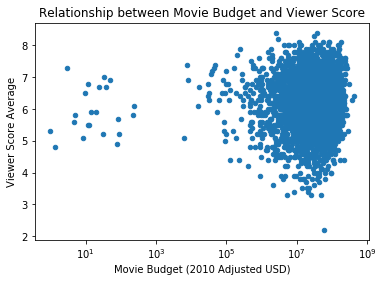

In [62]:
x = df.budget_adj
y = df.vote_average
df.plot(x = 'budget_adj', y = 'vote_average', logx = True, kind = 'scatter');
plt.title('Relationship between Movie Budget and Viewer Score');
plt.xlabel('Movie Budget (2010 Adjusted USD)');
plt.ylabel('Viewer Score Average');
np.corrcoef(x, y)

Despite applying log to the adjusted budget data, a clear trend is still not visible (`r = 0.037`). We can conclude that **no meaningful relationship can be found between Viewer Movie Scores and Movie Budget.**

### 2. What is the relationship between Viewer Movie Score and Movie Revenue?
A natural intuition is that movies that made a lot of revenue were more popular and therefore the viewers must have rated them higher.

array([[1.        , 0.26699608],
       [0.26699608, 1.        ]])

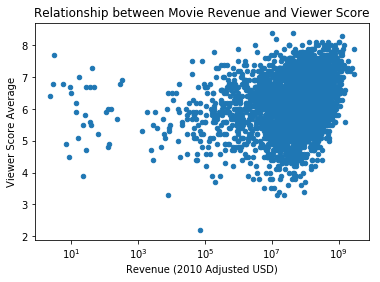

In [63]:
x = df.revenue_adj
y = df.vote_average
df.plot(x = 'revenue_adj', y = 'vote_average', logx = True, kind = 'scatter');
plt.title('Relationship between Movie Revenue and Viewer Score');
plt.xlabel('Revenue (2010 Adjusted USD)');
plt.ylabel('Viewer Score Average');
np.corrcoef(x, y)

We are seeing more of a positive trend here compared to Movie Budget, but at `r = 0.267`. This is not strong enough to draw a conclusion. **No meaningful relationship can be found between Viewer Movie Score and Movie Revnue**

### 3. What is the relationship between Viewer Movie Score and Movie Runtime?

array([[1.        , 0.35190898],
       [0.35190898, 1.        ]])

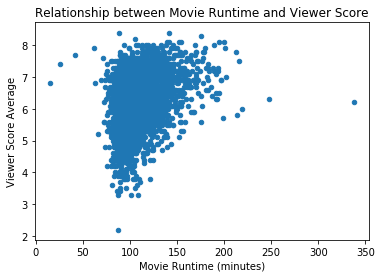

In [64]:
x = df.runtime
y = df.vote_average
df.plot(x = 'runtime', y = 'vote_average', kind = 'scatter');
plt.title('Relationship between Movie Runtime and Viewer Score');
plt.xlabel('Movie Runtime (minutes)');
plt.ylabel('Viewer Score Average');
np.corrcoef(x,y)

Surprisingly, we observe a **moderate positive correlation** of `r = 0.352` between Movie Runtime and Viewer Score.

### 4. What is the relationship between Viewer Movie Score and Genre?

In [65]:
#Take a look at the number of movies in each category
df.genres.value_counts()

Drama              890
Comedy             787
Action             689
Adventure          314
Horror             275
Crime              172
Thriller           160
Fantasy            110
Animation          103
Science Fiction     98
Romance             66
Family              40
Mystery             36
Documentary         32
Music               29
War                 20
History             17
Western             16
TV Movie             1
Name: genres, dtype: int64

In [66]:
#There is only 1 movie with the genre, 'TV Movie'. As the sample size is too small compared to other movie genres, we will remove this movie from our data.
df = df[df.genres != "TV Movie"]

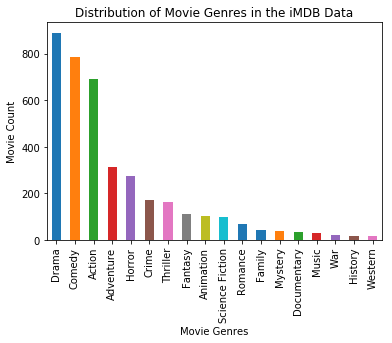

In [67]:
#Let's take a look at the distribution of movie genres now:
df.genres.value_counts().plot(kind = 'bar');
plt.title('Distribution of Movie Genres in the iMDB Data');
plt.xlabel('Movie Genres');
plt.ylabel('Movie Count');

Out of 3854 movies, **Drama, Comedy, and Action movies make up almost 60% (59.8%) of the movie data.** A further analysis with the iMDB data could look at why there is so much of these movies compared to other genres.

In [68]:
df.groupby(['genres'])['vote_average'].mean()

genres
Action             5.996517
Adventure          6.250955
Animation          6.361165
Comedy             6.017154
Crime              6.451744
Documentary        6.656250
Drama              6.437978
Family             6.100000
Fantasy            6.080000
History            6.494118
Horror             5.749818
Music              6.193103
Mystery            6.136111
Romance            6.451515
Science Fiction    6.244898
Thriller           5.993125
War                6.480000
Western            6.418750
Name: vote_average, dtype: float64

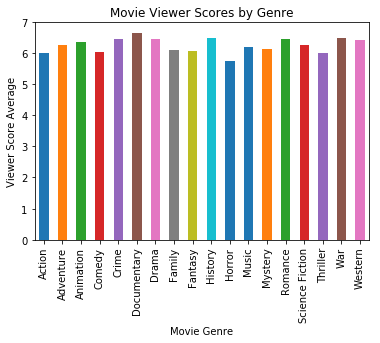

In [69]:
df.groupby(['genres'])['vote_average'].mean().plot(kind = 'bar')
plt.title('Movie Viewer Scores by Genre')
plt.xlabel('Movie Genre')
plt.ylabel('Viewer Score Average');

Documentary was rated highest among viewers whereas Horror was rated the lowest.

<a id='conclusions'></a>
## Conclusions

The analysis was not able to find any meaningful correlation between viewer movie score vs. movie budget and vs. movie revenue. However, a moderate positive correlation (`0.3 < r < 0.5`) was found between **viewer movie score and movie runtime** (`r = 0.352`). This may be explained by the fact that shorter movies tend to feel rushed and have more story loopholes. However, a movie director would not expect higher ratings just because a movie is excruciatingly long. Viewer scores will start falling at a certain critical point in runtime. This relationship between movie runtime and viewer score calls for a further statistical analysis, which is not covered here today.

The genre of movie that received the **highest viewer score was Documentary**. This may mean that movie goers appreciate new information and learning experiences from a movie more than a simple fun-packed action film as one may assume. Statistics covering significance of viewer score differences between the genres is the next statistical step to take this analysis further.

There were some limitations to the study that hindered our chances of finding much more meaningful results. Movies that had missing data (represented by 0) in budget and revenue had no choice but to be removed from our study per nature of our question. This massively **reduced our sample size by roughly 65%**. Our questions focused heavily on Viewer Movie Score, which is an average of collection of movie ratings posted on iMDB. We need to pay attention to the fact that **people who leave movie ratings on iMDB is most likely different in how they view and enjoy movies**, apart from regular movie goers. These iMDB viewer scores may be submitted by an aspiring movie critic, a films studies student, or maybe a passionate fan of an IP or production. Hence, it is important to realize that if movie theaters had forced its viewers to rate the movie they had just watched, this collection of scores would be a much better statistics to work with for the purposes of our analysis. 